In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [2]:
import os
# Correct file path, use raw string literal to avoid issues with backslashes
file_path = r'D:\Gans\training_checkpoints\fashion-mnist_train.csv'

# Check if the file exists
try:
    train = pd.read_csv(file_path)
    train = train.drop(['label'], axis=1).to_numpy().reshape(-1, 28, 28, 1)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

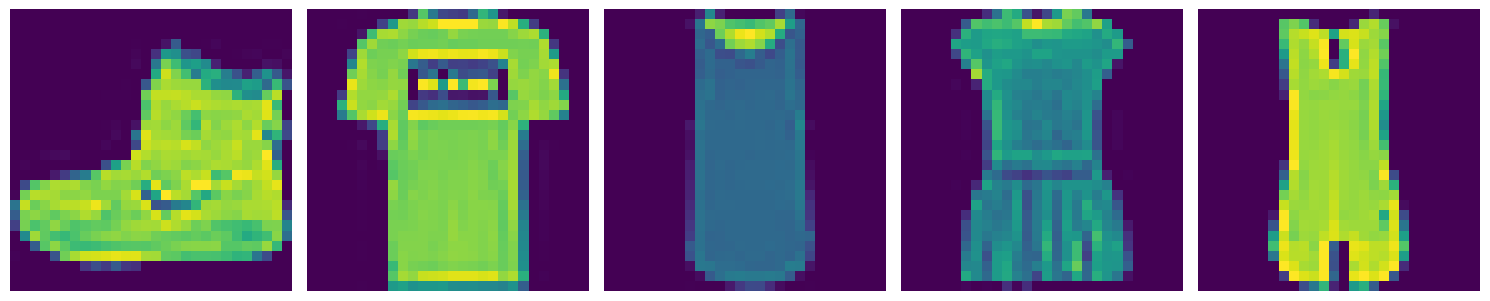

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load the MNIST Fashion dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

fig, axes = plt.subplots(1, 5, figsize=(15, 15))

# Define a colormap for visualization
cmap = plt.get_cmap('viridis')

for index, image in enumerate(train_images[:5]):
    # Normalize the grayscale image to range [0, 1]
    normalized_image = image / 255.0
    colored_image = cmap(normalized_image)
    axes[index].imshow(colored_image)
    axes[index].axis('off')  # Turn off axis ticks

plt.tight_layout()
plt.show()

In [4]:
def preprocess(records):
    images =  records['image']
    images = tf.cast(images, tf.float32)/255.0
    return images

dataset = tf.data.Dataset.from_tensor_slices({'image':train})
dataset = dataset.map(preprocess)
dataset = dataset.repeat(3).shuffle(100).batch(128).prefetch(1)

In [5]:
print(dataset)

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>


In [6]:
input_shape = (28,28,1)
final_encoder_dim = 2
decoder_input_dim = 4
depth = 5
kernel_size = 3
activation = 'tanh'
dropout = 0.1

In [7]:

def discriminator(input_shape, dim, depth, kernel, dropout,activation):
    layers = []
    layers.append(InputLayer(input_shape=input_shape))
    for i in range(1,depth):
        layers.append(Conv2D(16*i,kernel_size=kernel_size))
        layers.append(BatchNormalization())
        layers.append(Activation('relu'))
        layers.append(Dropout(dropout))
    layers.append(Flatten())
    layers.append(Dense(128,activation='relu'))
    layers.append(Dense(dim))
    return Sequential(layers)

encoder = discriminator(input_shape, final_encoder_dim, depth, kernel_size, dropout,activation)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 22, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 22, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,324,210 (12.68 MB)

 Trainable params: 3,323,890 (12.68 MB)

 Non-trainable params: 320 (1.25 KB)

In [9]:
def generator(input_shape, depth, output_shape,kernel,dropout):
    layers = []
    layers.append(InputLayer(input_shape=(input_shape,)))
    layers.append(Dense(784,activation='relu'))
    layers.append(Reshape(target_shape=output_shape))
    for i in range(1,depth):
        layers.append(Conv2DTranspose(16*i,kernel_size=kernel))
        layers.append(BatchNormalization())
        layers.append(Activation('relu'))
        layers.append(Dropout(dropout))
    
    resizer =  lambda name: Lambda(lambda images: tf.image.resize(images, [28,28]), name=name)
    layers.append(resizer('Reshape'))
    layers.append(Conv2DTranspose(1,kernel_size=1,activation=None))
    return Sequential(layers)
decoder = generator(decoder_input_dim, depth, input_shape,kernel_size,dropout)

In [10]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 784)            │         3,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 30, 30, 16)     │           160 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 32)     │         4,640 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 34, 34, 48)     │        13,872 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 34, 34, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 34, 34, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 34, 34, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 36, 36, 64)     │        27,712 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Reshape (Lambda)                │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 1)      │            65 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 51,009 (199.25 KB)

 Trainable params: 50,689 (198.00 KB)

 Non-trainable params: 320 (1.25 KB)

In [11]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
encoder_opt = tf.keras.optimizers.Adam()
decoder_opt = tf.keras.optimizers.Adam()

In [12]:

def training(training_data):
    batch_size = tf.shape(training_data)[0]
    real_data = training_data
    real_labels = tf.ones((batch_size,))
    fake_labels = tf.zeros((batch_size,))
    labels = tf.concat((real_labels,fake_labels),axis=0)
    noise = tf.random.normal((batch_size,decoder_input_dim),mean=0,stddev=1)
    
    with tf.GradientTape() as decoder_gt, tf.GradientTape() as encoder_gt:
        
        fake_images = decoder(noise,training=True)
        fake_labels_2 = encoder(fake_images,training=True)
        real_labels_2 = encoder(training_data,training=True)
        predicted_labels = tf.concat((real_labels_2,fake_labels_2),axis=0)
        

        discrim_loss = loss(labels,predicted_labels)
        #print(discrim_loss)
        gen_loss = loss(real_labels,fake_labels_2)
        
    dec_grad = decoder_gt.gradient(gen_loss,decoder.trainable_variables)
    enc_grad = encoder_gt.gradient(discrim_loss,encoder.trainable_variables)
    
    decoder_opt.apply_gradients(zip(dec_grad, decoder.trainable_variables))
    encoder_opt.apply_gradients(zip(enc_grad, encoder.trainable_variables))
    
    return discrim_loss, gen_loss

In [13]:

import os
def epoch_training(data_iterator, steps_per_epoch, avg_gen_loss, avg_dis_loss):
    for x in range(steps_per_epoch):
        d_loss, g_loss = training(next(data_iterator))
        avg_gen_loss.update_state(g_loss)
        avg_dis_loss.update_state(d_loss)
        if x%20==0:
            print('{} steps done'.format(x))
            
    gen_loss = avg_gen_loss.result()
    dis_loss = avg_dis_loss.result()
    
    
    tf.summary.scalar('gen_loss',gen_loss,step=encoder_opt.iterations)
    tf.summary.flush()
    tf.summary.scalar('dis_loss',dis_loss,step=decoder_opt.iterations)
    tf.summary.flush()
    
    avg_gen_loss.reset_state()
    avg_dis_loss.reset_state()
    return gen_loss.numpy(), dis_loss.numpy()
    
def train(training_data, epochs):
    checkpoint_dir = './training_checkpoints'
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator_optimizer=decoder_opt,discriminator_optimizer=encoder_opt,generator=decoder,discriminator=encoder)
    manager = tf.train.CheckpointManager(checkpoint, 'training_checkpoints', max_to_keep=5)
    checkpoint.restore(manager.latest_checkpoint)
    
    summary = tf.summary.create_file_writer('metrics/train')
    
    avg_generator_loss = tf.keras.metrics.Mean()
    avg_discriminator_loss = tf.keras.metrics.Mean()
    
    data_iterator = training_data.__iter__()
    for i in range(epochs):
        with summary.as_default():
            gen_loss, dis_loss = epoch_training(data_iterator, 100, avg_generator_loss, avg_discriminator_loss)
            print({'gen_loss':gen_loss,'dis_loss':dis_loss})
            manager.save()


In [14]:
import tensorflow as tf

# Example model and optimizer definitions
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

decoder_opt = tf.keras.optimizers.Adam(1e-4)
encoder_opt = tf.keras.optimizers.Adam(1e-4)

# Ensure these objects are correctly passed to Checkpoint
try:
    checkpoint = tf.train.Checkpoint(
        generator_optimizer=decoder_opt,
        discriminator_optimizer=encoder_opt,
        generator=decoder,
        discriminator=encoder
    )
    checkpoint_dir = './training_checkpoints'
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    manager = tf.train.CheckpointManager(checkpoint, checkpoint_prefix, max_to_keep=5)

    # Restore latest checkpoint if it exists
    checkpoint.restore(manager.latest_checkpoint)

    if manager.latest_checkpoint:
        print(f"Restored from {manager.latest_checkpoint}")
    else:
        print("Initializing from scratch.")
except ValueError as e:
    print(f"An error occurred: {e}")


Initializing from scratch.


In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

def load_fashion_mnist():
    # Load Fashion MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    # Normalize pixel values to [0, 1]
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return (train_images, train_labels), (test_images, test_labels)

def create_model():
    # Create a simple Sequential model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten input to 1D array
        Dense(128, activation='relu'),  # Dense layer with ReLU activation
        Dense(10)  # Output layer with 10 units (one for each class)
    ])
    return model

def complete_training(dataset, epochs):
    train_images, train_labels = dataset

    # Create and compile the model
    model = create_model()
    model.compile(optimizer=Adam(),
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=epochs)

    return model  # Optionally return the trained model

# Example usage:
(train_images, train_labels), _ = load_fashion_mnist()
epochs = 10

trained_model = complete_training((train_images, train_labels), epochs)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7764 - loss: 0.6351
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8607 - loss: 0.3889
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8749 - loss: 0.3441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8831 - loss: 0.3159
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8875 - loss: 0.3014
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8986 - loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9027 - loss: 0.2651
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9029 - loss: 0.2571
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9083 - loss: 0.2447
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9116 - loss: 0.2353


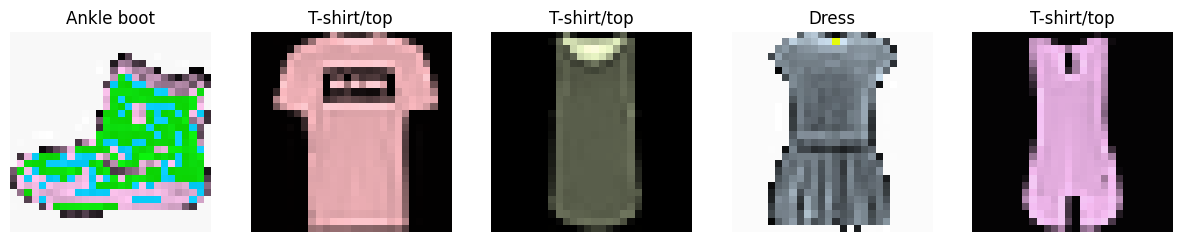

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert grayscale images to RGB by stacking
x_train_rgb = np.stack((x_train,)*3, axis=-1)
x_test_rgb = np.stack((x_test,)*3, axis=-1)

# Function to apply random colors to grayscale images
def apply_random_color(image):
    # Convert image to float32 for multiplication
    image = image.astype(np.float32)
    
    # Random RGB multipliers
    r_multiplier = np.random.uniform(0.8, 1.2)
    g_multiplier = np.random.uniform(0.8, 1.2)
    b_multiplier = np.random.uniform(0.8, 1.2)
    
    # Apply multipliers
    colored_image = image.copy()
    colored_image[:, :, 0] *= r_multiplier
    colored_image[:, :, 1] *= g_multiplier
    colored_image[:, :, 2] *= b_multiplier
    
    # Clip values to [0, 255] range and convert back to uint8
    colored_image = np.clip(colored_image, 0, 255).astype(np.uint8)           
    return colored_image

# Function to apply controlled augmentations
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    image = tf.image.random_saturation(image, lower=0.9, upper=1.1)
    return image

# Apply colorization and augmentations to sample images
augmented_images = []
for i in range(5):
    img = x_train_rgb[i]
    colored_img = apply_random_color(img)
    augmented_img = augment_image(tf.convert_to_tensor(colored_img, dtype=tf.float32)).numpy().astype(np.uint8)
    augmented_images.append(augmented_img)

# Function to display images
def display_images(images, labels, class_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(class_names[labels[i]])
    plt.show()

# Display augmented RGB images
display_images(augmented_images, y_train[:5], class_names)





In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint